In [1]:
#Elastic
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("/home/placement/Downloads/fiat500.csv")

In [3]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [4]:
data.head()

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700


In [5]:
data1=data.loc[(data.previous_owners)==1]

In [6]:
data1

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700
...,...,...,...,...,...,...,...,...,...
1533,1534,sport,51,3712,115280,1,45.069679,7.704920,5200
1534,1535,lounge,74,3835,112000,1,45.845692,8.666870,4600
1535,1536,pop,51,2223,60457,1,45.481541,9.413480,7500
1536,1537,lounge,51,2557,80750,1,45.000702,7.682270,5990


In [7]:
data2=data1.drop(['ID','lat','lon'],axis=1)

In [8]:
data2

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [9]:
data2=pd.get_dummies(data2)

In [10]:
data2

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
1,51,1186,32500,1,8800,0,1,0
2,74,4658,142228,1,4200,0,0,1
3,51,2739,160000,1,6000,1,0,0
4,73,3074,106880,1,5700,0,1,0
...,...,...,...,...,...,...,...,...
1533,51,3712,115280,1,5200,0,0,1
1534,74,3835,112000,1,4600,1,0,0
1535,51,2223,60457,1,7500,0,1,0
1536,51,2557,80750,1,5990,1,0,0


In [11]:
y=data2['price']
x=data2.drop('price',axis=1)

In [12]:
y

0       8900
1       8800
2       4200
3       6000
4       5700
        ... 
1533    5200
1534    4600
1535    7500
1536    5990
1537    7900
Name: price, Length: 1389, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [14]:
x_test.head()

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
625,51,3347,148000,1,1,0,0
187,51,4322,117000,1,1,0,0
279,51,4322,120000,1,0,1,0
734,51,974,12500,1,0,1,0
315,51,1096,37000,1,1,0,0


In [15]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

elastic_regressor = GridSearchCV(elastic, parameters)

elastic_regressor.fit(x_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [16]:
elastic_regressor.best_params_

{'alpha': 0.01}

In [17]:
elastic=ElasticNet(alpha=.01)
elastic.fit(x_train,y_train)
y_pred_elastic=elastic.predict(x_test)

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_elastic)

0.8602162350730707

In [19]:
from sklearn.metrics import mean_squared_error
elastic_Error=mean_squared_error(y_pred_elastic,y_test)
elastic_Error

515349.978787187

In [20]:
Results=pd.DataFrame(columns=['actual','predicted'])
Results['actual']=y_test
Results['predicted']=y_pred_elastic
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(15)

,index,actual,predicted,Id
0,625,5400,5482.171479,0
1,187,5399,5127.531740,1
2,279,4900,4803.203231,2
3,734,10500,9662.825235,3
4,315,9300,9408.645424,4
5,652,10850,10350.952605,5
6,1472,9500,9806.127960,6
7,619,7999,8341.142824,7
8,992,6300,5913.786719,8
9,1154,10000,10149.093829,9


[]

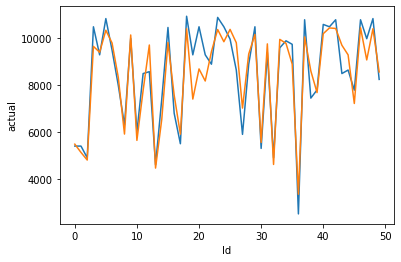

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='actual',data=Results.head(50))
sns.lineplot(x='Id',y='predicted',data=Results.head(50))
plt.plot()